# Connect to database

In [2]:
from query_database import QueryDatabase
from database import Database
from constants import DATABASE_PATH

df = QueryDatabase("SELECT * FROM supplier_invoice.invoice_202408;").df
df.head()

,Förvaltning,Leverantör,Organisationsnummer,Verifikationsnummer,Konto,Kontotext,Belopp exkl moms
0,Stadsmiljönämnden,TRACK TEC GMBH,106/5727/0626,4001291513,4101,Inköp anläggnings och underhållsmaterial,"9 835 315,00"
1,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378982,6185,Anläggningsentreprenad,"870,00"
2,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601377374,6185,Anläggningsentreprenad,"870,00"
3,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378519,6185,Anläggningsentreprenad,"870,00"
4,Exploateringsnämnden,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,2001226894,7641,Diverse skatter och offentliga avgifter,"1 000,00"


In [ ]:
df.shape

(92989, 7)

In [ ]:
df.loc[:, "Belopp exkl moms"] = df["Belopp exkl moms"].str[:-3].str.replace(" ", "").astype(int)

AttributeError: Can only use .str accessor with string values!

In [14]:
df.head()

,Förvaltning,Leverantör,Organisationsnummer,Verifikationsnummer,Konto,Kontotext,Belopp exkl moms
0,Stadsmiljönämnden,TRACK TEC GMBH,106/5727/0626,4001291513,4101,Inköp anläggnings och underhållsmaterial,9835315
1,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378982,6185,Anläggningsentreprenad,870
2,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601377374,6185,Anläggningsentreprenad,870
3,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378519,6185,Anläggningsentreprenad,870
4,Exploateringsnämnden,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,2001226894,7641,Diverse skatter och offentliga avgifter,1000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92989 entries, 0 to 92988
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Förvaltning          92989 non-null  object
 1   Leverantör           92989 non-null  object
 2   Organisationsnummer  92843 non-null  object
 3   Verifikationsnummer  92989 non-null  int64 
 4   Konto                92989 non-null  int64 
 5   Kontotext            92989 non-null  object
 6   Belopp exkl moms     92989 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.0+ MB


In [24]:
from database import Database
from constants import DATABASE_PATH

with Database(DATABASE_PATH) as db:
    #register make it so that I can use df inside of duckdb
    db.connection.register('df', df)
    db.query("CREATE SCHEMA IF NOT EXISTS refined_layer;")
    db.query("""
    CREATE TABLE IF NOT EXISTS refined_layer.invoice_202407
             AS SELECT * FROM df;
    """)

In [25]:
QueryDatabase("SELECT * FROM refined_layer.invoice_202407;").df

,Förvaltning,Leverantör,Organisationsnummer,Verifikationsnummer,Konto,Kontotext,Belopp exkl moms
0,Stadsmiljönämnden,TRACK TEC GMBH,106/5727/0626,4001291513,4101,Inköp anläggnings och underhållsmaterial,9835315
1,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378982,6185,Anläggningsentreprenad,870
2,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601377374,6185,Anläggningsentreprenad,870
3,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378519,6185,Anläggningsentreprenad,870
4,Exploateringsnämnden,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,2001226894,7641,Diverse skatter och offentliga avgifter,1000
...,...,...,...,...,...,...,...
92984,Stadsmiljönämnden,VIANOVA,SAKNAS,4001295782,7432,IT tjänster,-263400
92985,Stadsmiljönämnden,VIANOVA,SAKNAS,4001290661,7432,IT tjänster,263400
92986,Stadsfastighetsnämnden,WINDOWMASTER A/S,SAKNAS,2302185009,6151,Mindre reparation o underhåll fastighet,23518
92987,Stadsfastighetsnämnden,WINDOWMASTER A/S,SAKNAS,2302185009,2677,"Beräknad utg moms tjänsteinköp i Sverige, 25%",-5879


In [36]:
QueryDatabase("SELECT * FROM information_schema.tables").df

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action,TABLE_COMMENT
0,goteborg_stad,refined_layer,invoice_202407,BASE TABLE,None,None,None,None,None,YES,NO,None,None
1,goteborg_stad,supplier_invoice,invoice_202407,BASE TABLE,None,None,None,None,None,YES,NO,None,None
2,goteborg_stad,supplier_invoice,invoice_202408,BASE TABLE,None,None,None,None,None,YES,NO,None,None


In [33]:
QueryDatabase("DROP TABLE main.refined_layer_202407").df

,Success


In [35]:
QueryDatabase("DROP TABLE main.invoice_202407").df

,Success


In [45]:
df = QueryDatabase("""
SELECT 
            leverantör,
            SUM("Belopp exkl moms") AS "Summa (kr)"
FROM refined_layer.invoice_202407
GROUP BY
              leverantör
ORDER BY "Summa (kr)" DESC
              """).df

df

,Leverantör,Summa (kr)
0,GÖTEBORGS STADS LEASING AB,62433766.0
1,KPA PENSIONSSERVICE AB,59741750.0
2,RÄDDNINGSTJÄNSTEN STORGÖTEBORG,55320824.0
3,PURAC AB,48603208.0
4,RENOVA,34435107.0
...,...,...
2914,LILLA EDETS KOMMUN,-16555.0
2915,ARBETSLIVSRESURS AR AB,-19384.0
2916,KINNARPS AB,-78016.0
2917,BRF KARLAGATAN 10-12,-298927.0


<Axes: title={'center': 'Top 5 spending in Göteborgs kommun'}, ylabel='Leverantör'>

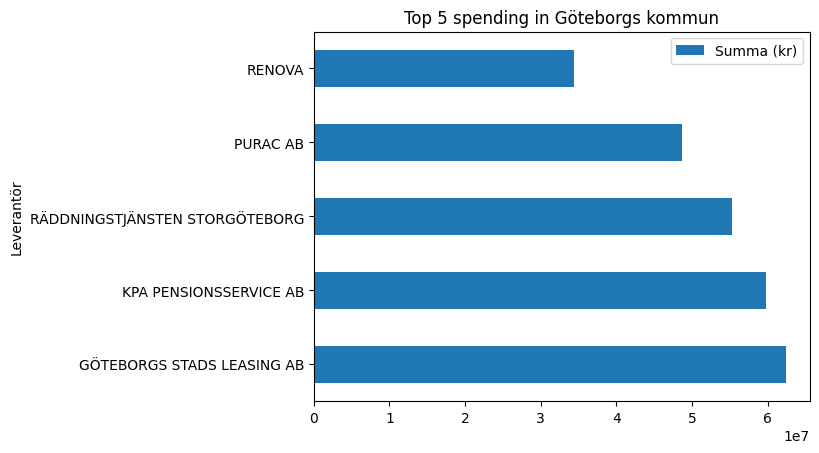

In [46]:
df.head().plot(kind="barh", x="Leverantör", y="Summa (kr)", title="Top 5 spending in Göteborgs kommun")

In [48]:
df = QueryDatabase("""
SELECT 
       *
FROM refined_layer.invoice_202407
              """).df
df

,Förvaltning,Leverantör,Organisationsnummer,Verifikationsnummer,Konto,Kontotext,Belopp exkl moms
0,Stadsmiljönämnden,TRACK TEC GMBH,106/5727/0626,4001291513,4101,Inköp anläggnings och underhållsmaterial,9835315
1,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378982,6185,Anläggningsentreprenad,870
2,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601377374,6185,Anläggningsentreprenad,870
3,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378519,6185,Anläggningsentreprenad,870
4,Exploateringsnämnden,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,2001226894,7641,Diverse skatter och offentliga avgifter,1000
...,...,...,...,...,...,...,...
92984,Stadsmiljönämnden,VIANOVA,SAKNAS,4001295782,7432,IT tjänster,-263400
92985,Stadsmiljönämnden,VIANOVA,SAKNAS,4001290661,7432,IT tjänster,263400
92986,Stadsfastighetsnämnden,WINDOWMASTER A/S,SAKNAS,2302185009,6151,Mindre reparation o underhåll fastighet,23518
92987,Stadsfastighetsnämnden,WINDOWMASTER A/S,SAKNAS,2302185009,2677,"Beräknad utg moms tjänsteinköp i Sverige, 25%",-5879
